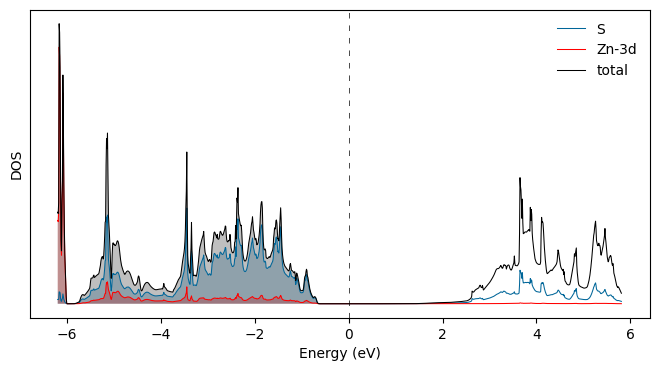

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

# load data
def data_loader(fname):
    import numpy as np

    data = np.loadtxt(fname)
    energy = data[:, 0]
    pdos = data[:, 1]  # ldos col, total contribution for a given orbital

    return energy, pdos
c = 0
for i in [2,3,4,5,6,7,8,10]:
    c += 1
    i = str(i)
    fnameprefix = f"Ud.{i}"
    energy, pdos_Zn_3d = data_loader(f'{fnameprefix}/Zn_3d.pdos')
    _, pdos_S = data_loader(f'{fnameprefix}/S.pdos')
    _, pdos_tot = data_loader(f'{fnameprefix}/ZnS_hub.pdos_tot')
    fermi = 5.5452
    # make plots
    plt.figure(figsize = (16, 16))
    plt.subplot(4, 2, c)
    plt.plot(energy-fermi, pdos_S, linewidth=0.75, color='#006699', label='S')
    plt.plot(energy-fermi, pdos_Zn_3d, linewidth=0.75, color='r', label='Zn-3d')
    plt.plot(energy-fermi, pdos_tot, linewidth=0.75, color='k', label='total')
    plt.yticks([])
    plt.xlabel('Energy (eV)')
    plt.ylabel('DOS')
    plt.axvline(x= 0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
    #plt.xlim(-5, 27)
    #plt.ylim(0, )
    plt.fill_between(energy-fermi, 0, pdos_S, where=(energy-fermi < 0), facecolor='#006699', alpha=0.25)
    plt.fill_between(energy-fermi, 0, pdos_Zn_3d, where=(energy-fermi < 0), facecolor='r', alpha=0.25)
    plt.fill_between(energy-fermi, 0, pdos_tot, where=(energy-fermi < 0), facecolor='k', alpha=0.25)
    # plt.text(6.5, 0.52, 'Fermi energy', fontsize= small, rotation=90)
    plt.legend(frameon=False)
plt.show()